<a href="https://colab.research.google.com/github/Karan1106/1-Solution/blob/master/Cifar10_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2




```
# This is formatted as code
```

#Baseline: 1 VGG Block

In [0]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [0]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [0]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  
  # example output part of the model
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
define_model().summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable para

In [0]:
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.k1", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, mode='auto')
	history = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY),callbacks=[checkpoint,early])
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

170500096/170498071 [==============================] - 4s 0us/step

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 11s 229us/step - loss: 1.7816 - accuracy: 0.3660 - val_loss: 1.5794 - val_accuracy: 0.4439

Epoch 00001: val_accuracy improved from -inf to 0.44390, saving model to vgg16_1.k1
Epoch 2/30
50000/50000 [==============================] - 5s 99us/step - loss: 1.4695 - accuracy: 0.4752 - val_loss: 1.4044 - val_accuracy: 0.5031

Epoch 00002: val_accuracy improved from 0.44390 to 0.50310, saving model to vgg16_1.k1
Epoch 3/30
50000/50000 [==============================] - 5s 103us/step - loss: 1.3193 - accuracy: 0.5312 - val_loss: 1.2525 - val_accuracy: 0.5545

Epoch 00003: val_accuracy improved from 0.50310 to 0.55450, saving model to vgg16_1.k1
Epoch 4/30
50000/50000 [==============================] - 5s 99us/step - loss: 1.2203 - accuracy: 0.5677 - val_loss: 1.2029 - val_accuracy: 0.5678

Epoch 00004: val_accuracy imp

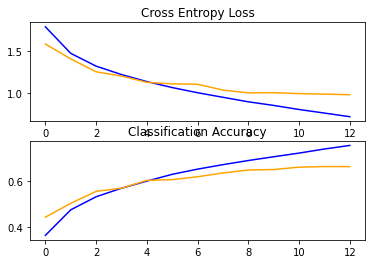

In [0]:
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()

In [0]:
#Saving the Model
	model.save('first_model.h5')


In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

# Now Predict
predict_dir_path=("drive/My Drive/Colab Notebooks/Folder1/")
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['AEROPLANE1.jpeg', 'AEROPLANE2.jpeg', 'AEROPLANE3.jpeg', 'AEROPLANE4.jpeg', 'AUTOMOBILE5.jpeg', 'AUTMOBILE6.jpeg', 'AUTOMOBILE7.jpeg', 'AUTOMOBILE8.jpeg', 'AUTOMOBILE9.jpeg', 'BIRD (10).jpeg', 'BIRD (11).jpeg', 'BIRD (12).jpeg', 'BIRD (13).jpeg', 'BIRD (14).jpeg', 'BIRD (15).jpeg', 'BIRD (16).jpeg', 'CAT (17).jpeg', 'CAT (18).jpeg', 'CAT (19).jpeg', 'CAT (20).jpeg', 'CAT (21).jpeg', 'DEER (22).jpeg', 'DEER (23).jpeg', 'DEER (24).jpeg', 'DEER (25).jpeg', 'DEER (26).jpeg', 'DOG (27).jpeg', 'DOG (28).jpeg', 'DOG (29).jpeg', 'DOG (30).jpeg', 'DOG (31).jpeg', 'FROG (32).jpeg', 'FROG (33).jpeg', 'FROG (34).jpeg', 'FROG (35).jpeg', 'HORSE (36).jpeg', 'HORSE (37).jpeg', 'HORSE (38).jpeg', 'HORSE (39).jpeg', 'HORSE (40).jpeg', 'SHIP (41).jpeg', 'SHIP (42).jpeg', 'TRUCK (49).jpeg', 'TRUCK (50).jpeg', 'TRUCK (48).jpeg', 'TRUCK (47).jpeg', 'SHIP (43).jpeg', 'SHIP (44).jpeg', 'SHIP (45).jpeg', 'SHIP (46).jpeg']


In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/first_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

AEROPLANE1.jpeg: airplane
AEROPLANE2.jpeg: airplane
AEROPLANE3.jpeg: airplane
AEROPLANE4.jpeg: airplane
AUTOMOBILE5.jpeg: automobile
AUTMOBILE6.jpeg: automobile
AUTOMOBILE7.jpeg: automobile
AUTOMOBILE8.jpeg: frog
AUTOMOBILE9.jpeg: automobile
BIRD (10).jpeg: bird
BIRD (11).jpeg: bird
BIRD (12).jpeg: bird
BIRD (13).jpeg: dog
BIRD (14).jpeg: frog
BIRD (15).jpeg: bird
BIRD (16).jpeg: bird
CAT (17).jpeg: dog
CAT (18).jpeg: dog
CAT (19).jpeg: horse
CAT (20).jpeg: dog
CAT (21).jpeg: dog
DEER (22).jpeg: deer
DEER (23).jpeg: cat
DEER (24).jpeg: frog
DEER (25).jpeg: cat
DEER (26).jpeg: frog
DOG (27).jpeg: dog
DOG (28).jpeg: dog
DOG (29).jpeg: cat
DOG (30).jpeg: dog
DOG (31).jpeg: dog
FROG (32).jpeg: frog
FROG (33).jpeg: dog
FROG (34).jpeg: ship
FROG (35).jpeg: frog
HORSE (36).jpeg: horse
HORSE (37).jpeg: horse
HORSE (38).jpeg: horse
HORSE (39).jpeg: horse
HORSE (40).jpeg: horse
SHIP (41).jpeg: ship
SHIP (42).jpeg: ship
TRUCK (49).jpeg: automobile
TRUCK (50).jpeg: truck
TRUCK (48).jpeg: cat
TRUCK

#Baseline: 2 VGG Blocks

In [0]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

  
  # example output part of the model
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# fit model
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.k2", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, mode='auto')
history = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[checkpoint,early])
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 160us/step - loss: 1.6928 - accuracy: 0.3950 - val_loss: 1.4382 - val_accuracy: 0.4918

Epoch 00001: val_accuracy improved from -inf to 0.49180, saving model to vgg16_1.k2
Epoch 2/30
50000/50000 [==============================] - 7s 138us/step - loss: 1.3524 - accuracy: 0.5206 - val_loss: 1.2475 - val_accuracy: 0.5636

Epoch 00002: val_accuracy improved from 0.49180 to 0.56360, saving model to vgg16_1.k2
Epoch 3/30
50000/50000 [==============================] - 7s 140us/step - loss: 1.1664 - accuracy: 0.5888 - val_loss: 1.1220 - val_accuracy: 0.6046

Epoch 00003: val_accuracy improved from 0.56360 to 0.60460, saving model to vgg16_1.k2
Epoch 4/30
50000/50000 [==============================] - 7s 142us/step - loss: 1.0269 - accuracy: 0.6408 - val_loss: 1.0149 - val_accuracy: 0.6422

Epoch 00004: val_accuracy improved from 0.60460 to 0.64220, saving model to vgg16_1.k2
Epoch 5/3

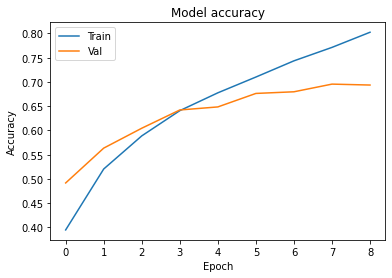

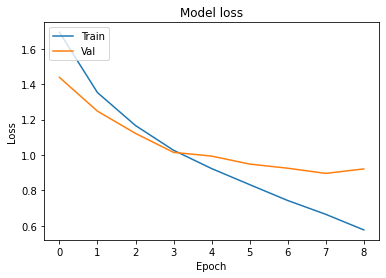

In [0]:
# Plot training & validation accuracy values

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

In [0]:
# save model
	model.save('second_model.h5')

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/second_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

AEROPLANE1.jpeg: airplane
AEROPLANE2.jpeg: airplane
AEROPLANE3.jpeg: airplane
AEROPLANE4.jpeg: airplane
AUTOMOBILE5.jpeg: automobile
AUTMOBILE6.jpeg: automobile
AUTOMOBILE7.jpeg: automobile
AUTOMOBILE8.jpeg: truck
AUTOMOBILE9.jpeg: automobile
BIRD (10).jpeg: bird
BIRD (11).jpeg: frog
BIRD (12).jpeg: airplane
BIRD (13).jpeg: airplane
BIRD (14).jpeg: airplane
BIRD (15).jpeg: bird
BIRD (16).jpeg: bird
CAT (17).jpeg: dog
CAT (18).jpeg: dog
CAT (19).jpeg: truck
CAT (20).jpeg: deer
CAT (21).jpeg: dog
DEER (22).jpeg: horse
DEER (23).jpeg: deer
DEER (24).jpeg: frog
DEER (25).jpeg: truck
DEER (26).jpeg: frog
DOG (27).jpeg: deer
DOG (28).jpeg: dog
DOG (29).jpeg: cat
DOG (30).jpeg: truck
DOG (31).jpeg: dog
FROG (32).jpeg: frog
FROG (33).jpeg: dog
FROG (34).jpeg: truck
FROG (35).jpeg: frog
HORSE (36).jpeg: horse
HORSE (37).jpeg: horse
HORSE (38).jpeg: horse
HORSE (39).jpeg: horse
HORSE (40).jpeg: horse
SHIP (41).jpeg: ship
SHIP (42).jpeg: airplane
TRUCK (49).jpeg: truck
TRUCK (50).jpeg: automobile

#Baseline: 3 VGG Blocks

In [0]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  
  
  # example output part of the model
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.k3", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, mode='auto')
	history = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[checkpoint,early])
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 11s 215us/step - loss: 1.8083 - accuracy: 0.3454 - val_loss: 1.6539 - val_accuracy: 0.4119

Epoch 00001: val_accuracy improved from -inf to 0.41190, saving model to vgg16_1.k3
Epoch 2/30
50000/50000 [==============================] - 9s 172us/step - loss: 1.4395 - accuracy: 0.4813 - val_loss: 1.3401 - val_accuracy: 0.5183

Epoch 00002: val_accuracy improved from 0.41190 to 0.51830, saving model to vgg16_1.k3
Epoch 3/30
50000/50000 [==============================] - 9s 174us/step - loss: 1.2863 - accuracy: 0.5403 - val_loss: 1.2460 - val_accuracy: 0.5561

Epoch 00003: val_accuracy improved from 0.51830 to 0.55610, saving model to vgg16_1.k3
Epoch 4/30
50000/50000 [==============================] - 9s 176us/step - loss: 1.1616 - accuracy: 0.5862 - val_loss: 1.1418 - val_accuracy: 0.5902

Epoch 00004: val_accuracy improved from 0.55610 to 0.59020, saving model to vgg16_1.k3
Epoch 5/

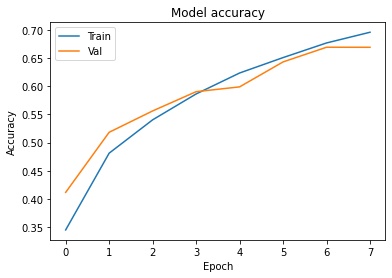

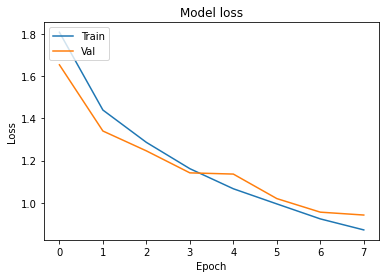

In [0]:
# Plot training & validation accuracy values

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

In [0]:
# save model
	model.save('Third_model.h5')

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/Third_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

AEROPLANE1.jpeg: airplane
AEROPLANE2.jpeg: airplane
AEROPLANE3.jpeg: airplane
AEROPLANE4.jpeg: airplane
AUTOMOBILE5.jpeg: automobile
AUTMOBILE6.jpeg: airplane
AUTOMOBILE7.jpeg: automobile
AUTOMOBILE8.jpeg: truck
AUTOMOBILE9.jpeg: automobile
BIRD (10).jpeg: bird
BIRD (11).jpeg: bird
BIRD (12).jpeg: airplane
BIRD (13).jpeg: frog
BIRD (14).jpeg: airplane
BIRD (15).jpeg: bird
BIRD (16).jpeg: bird
CAT (17).jpeg: dog
CAT (18).jpeg: cat
CAT (19).jpeg: truck
CAT (20).jpeg: frog
CAT (21).jpeg: cat
DEER (22).jpeg: deer
DEER (23).jpeg: frog
DEER (24).jpeg: frog
DEER (25).jpeg: cat
DEER (26).jpeg: frog
DOG (27).jpeg: dog
DOG (28).jpeg: dog
DOG (29).jpeg: cat
DOG (30).jpeg: frog
DOG (31).jpeg: cat
FROG (32).jpeg: frog
FROG (33).jpeg: frog
FROG (34).jpeg: frog
FROG (35).jpeg: frog
HORSE (36).jpeg: horse
HORSE (37).jpeg: horse
HORSE (38).jpeg: horse
HORSE (39).jpeg: horse
HORSE (40).jpeg: horse
SHIP (41).jpeg: ship
SHIP (42).jpeg: airplane
TRUCK (49).jpeg: truck
TRUCK (50).jpeg: truck
TRUCK (48).jpeg

# Dropout Regularization Techniques

In [0]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  
  
  # example output part of the model
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
	from keras.layers import Dropout
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.k4", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, mode='auto')
	history = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[checkpoint,early])
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 15s 293us/step - loss: 1.9934 - accuracy: 0.2606 - val_loss: 1.6485 - val_accuracy: 0.4151

Epoch 00001: val_accuracy improved from -inf to 0.41510, saving model to vgg16_1.k4
Epoch 2/30
50000/50000 [==============================] - 11s 221us/step - loss: 1.6344 - accuracy: 0.3959 - val_loss: 1.6031 - val_accuracy: 0.4177

Epoch 00002: val_accuracy improved from 0.41510 to 0.41770, saving model to vgg16_1.k4
Epoch 3/30
50000/50000 [==============================] - 11s 216us/step - loss: 1.4755 - accuracy: 0.4596 - val_loss: 1.3417 - val_accuracy: 0.5194

Epoch 00003: val_accuracy improved from 0.41770 to 0.51940, saving model to vgg16_1.k4
Epoch 4/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.3719 - accuracy: 0.5022 - val_loss: 1.2346 - val_accuracy: 0.5599

Epoch 00004: val_accuracy improved from 0.51940 to 0.55990, saving model to vgg16_1.k4
Epoch

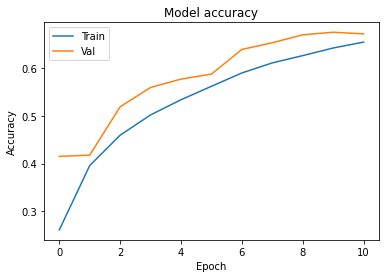

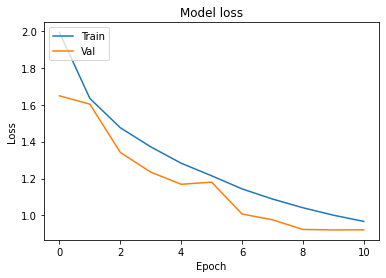

In [0]:
# Plot training & validation accuracy values

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

In [0]:
#Saving the model
model.save('fourth_model.h5')

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/Third_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

AEROPLANE1.jpeg: airplane
AEROPLANE2.jpeg: airplane
AEROPLANE3.jpeg: airplane
AEROPLANE4.jpeg: airplane
AUTOMOBILE5.jpeg: automobile
AUTMOBILE6.jpeg: airplane
AUTOMOBILE7.jpeg: automobile
AUTOMOBILE8.jpeg: truck
AUTOMOBILE9.jpeg: automobile
BIRD (10).jpeg: bird
BIRD (11).jpeg: bird
BIRD (12).jpeg: airplane
BIRD (13).jpeg: frog
BIRD (14).jpeg: airplane
BIRD (15).jpeg: bird
BIRD (16).jpeg: bird
CAT (17).jpeg: dog
CAT (18).jpeg: cat
CAT (19).jpeg: truck
CAT (20).jpeg: frog
CAT (21).jpeg: cat
DEER (22).jpeg: deer
DEER (23).jpeg: frog
DEER (24).jpeg: frog
DEER (25).jpeg: cat
DEER (26).jpeg: frog
DOG (27).jpeg: dog
DOG (28).jpeg: dog
DOG (29).jpeg: cat
DOG (30).jpeg: frog
DOG (31).jpeg: cat
FROG (32).jpeg: frog
FROG (33).jpeg: frog
FROG (34).jpeg: frog
FROG (35).jpeg: frog
HORSE (36).jpeg: horse
HORSE (37).jpeg: horse
HORSE (38).jpeg: horse
HORSE (39).jpeg: horse
HORSE (40).jpeg: horse
SHIP (41).jpeg: ship
SHIP (42).jpeg: airplane
TRUCK (49).jpeg: truck
TRUCK (50).jpeg: truck
TRUCK (48).jpeg

#WEIGHT DECAY

In [0]:
from keras.regularizers import l2
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
	from keras.layers import Dropout
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.k4", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, mode='auto')
	history = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[checkpoint,early])
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 17s 342us/step - loss: 2.8931 - accuracy: 0.3695 - val_loss: 2.6190 - val_accuracy: 0.4692

Epoch 00001: val_accuracy improved from -inf to 0.46920, saving model to vgg16_1.k4
Epoch 2/30
50000/50000 [==============================] - 12s 241us/step - loss: 2.5080 - accuracy: 0.5002 - val_loss: 2.4163 - val_accuracy: 0.5277

Epoch 00002: val_accuracy improved from 0.46920 to 0.52770, saving model to vgg16_1.k4
Epoch 3/30
50000/50000 [==============================] - 12s 241us/step - loss: 2.3307 - accuracy: 0.5573 - val_loss: 2.2535 - val_accuracy: 0.5758

Epoch 00003: val_accuracy improved from 0.52770 to 0.57580, saving model to vgg16_1.k4
Epoch 4/30
50000/50000 [==============================] - 12s 241us/step - loss: 2.1831 - accuracy: 0.6031 - val_loss: 2.1301 - val_accuracy: 0.6152

Epoch 00004: val_accuracy improved from 0.57580 to 0.61520, saving model to vgg16_1.k4
Epoch

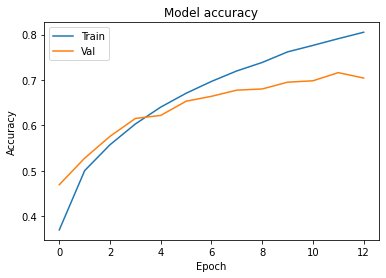

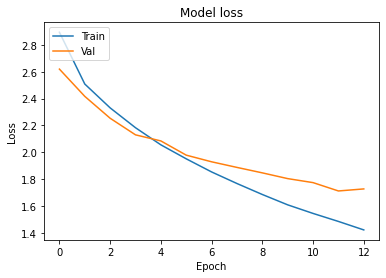

In [0]:
# Plot training & validation accuracy values

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

In [0]:
#Saving the model
model.save('fifth_model.h5')

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/Third_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

AEROPLANE1.jpeg: airplane
AEROPLANE2.jpeg: airplane
AEROPLANE3.jpeg: airplane
AEROPLANE4.jpeg: airplane
AUTOMOBILE5.jpeg: automobile
AUTMOBILE6.jpeg: airplane
AUTOMOBILE7.jpeg: automobile
AUTOMOBILE8.jpeg: truck
AUTOMOBILE9.jpeg: automobile
BIRD (10).jpeg: bird
BIRD (11).jpeg: bird
BIRD (12).jpeg: airplane
BIRD (13).jpeg: frog
BIRD (14).jpeg: airplane
BIRD (15).jpeg: bird
BIRD (16).jpeg: bird
CAT (17).jpeg: dog
CAT (18).jpeg: cat
CAT (19).jpeg: truck
CAT (20).jpeg: frog
CAT (21).jpeg: cat
DEER (22).jpeg: deer
DEER (23).jpeg: frog
DEER (24).jpeg: frog
DEER (25).jpeg: cat
DEER (26).jpeg: frog
DOG (27).jpeg: dog
DOG (28).jpeg: dog
DOG (29).jpeg: cat
DOG (30).jpeg: frog
DOG (31).jpeg: cat
FROG (32).jpeg: frog
FROG (33).jpeg: frog
FROG (34).jpeg: frog
FROG (35).jpeg: frog
HORSE (36).jpeg: horse
HORSE (37).jpeg: horse
HORSE (38).jpeg: horse
HORSE (39).jpeg: horse
HORSE (40).jpeg: horse
SHIP (41).jpeg: ship
SHIP (42).jpeg: airplane
TRUCK (49).jpeg: truck
TRUCK (50).jpeg: truck
TRUCK (48).jpeg

#Data Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# create data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
#fit model
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.k5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, mode='auto')
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=30, validation_data=(testX, testY), verbose=1,callbacks=[checkpoint,early])
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))


Epoch 1/30
781/781 [==============================] - 44s 56ms/step - loss: 1.8380 - accuracy: 0.3343 - val_loss: 1.6054 - val_accuracy: 0.4080

Epoch 00001: val_accuracy improved from -inf to 0.40800, saving model to vgg16_1.k5
Epoch 2/30
781/781 [==============================] - 38s 48ms/step - loss: 1.5153 - accuracy: 0.4509 - val_loss: 1.3534 - val_accuracy: 0.5109

Epoch 00002: val_accuracy improved from 0.40800 to 0.51090, saving model to vgg16_1.k5
Epoch 3/30
781/781 [==============================] - 38s 48ms/step - loss: 1.3691 - accuracy: 0.5099 - val_loss: 1.2019 - val_accuracy: 0.5666

Epoch 00003: val_accuracy improved from 0.51090 to 0.56660, saving model to vgg16_1.k5
Epoch 4/30
781/781 [==============================] - 37s 48ms/step - loss: 1.2649 - accuracy: 0.5465 - val_loss: 1.1618 - val_accuracy: 0.5858

Epoch 00004: val_accuracy improved from 0.56660 to 0.58580, saving model to vgg16_1.k5
Epoch 5/30
781/781 [==============================] - 37s 48ms/step - loss:

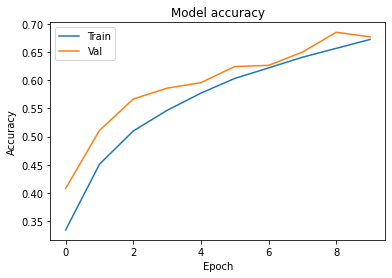

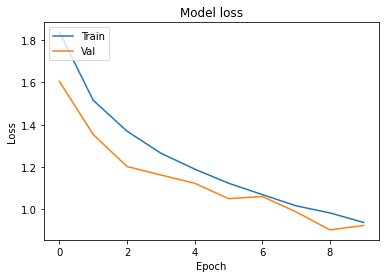

In [0]:
# Plot training & validation accuracy values

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

In [0]:
#save the model
model.save('Sixth_model.h5')

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/fifth_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

AEROPLANE1.jpeg: airplane
AEROPLANE2.jpeg: airplane
AEROPLANE3.jpeg: airplane
AEROPLANE4.jpeg: airplane
AUTOMOBILE5.jpeg: automobile
AUTMOBILE6.jpeg: automobile
AUTOMOBILE7.jpeg: automobile
AUTOMOBILE8.jpeg: truck
AUTOMOBILE9.jpeg: automobile
BIRD (10).jpeg: bird
BIRD (11).jpeg: bird
BIRD (12).jpeg: airplane
BIRD (13).jpeg: bird
BIRD (14).jpeg: automobile
BIRD (15).jpeg: bird
BIRD (16).jpeg: bird
CAT (17).jpeg: dog
CAT (18).jpeg: cat
CAT (19).jpeg: truck
CAT (20).jpeg: cat
CAT (21).jpeg: cat
DEER (22).jpeg: deer
DEER (23).jpeg: cat
DEER (24).jpeg: deer
DEER (25).jpeg: dog
DEER (26).jpeg: frog
DOG (27).jpeg: cat
DOG (28).jpeg: dog
DOG (29).jpeg: cat
DOG (30).jpeg: dog
DOG (31).jpeg: cat
FROG (32).jpeg: frog
FROG (33).jpeg: dog
FROG (34).jpeg: frog
FROG (35).jpeg: frog
HORSE (36).jpeg: horse
HORSE (37).jpeg: horse
HORSE (38).jpeg: horse
HORSE (39).jpeg: horse
HORSE (40).jpeg: horse
SHIP (41).jpeg: ship
SHIP (42).jpeg: airplane
TRUCK (49).jpeg: automobile
TRUCK (50).jpeg: automobile
TRUCK

#Variation of Dropout Regularization


In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# create data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
#fit model
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.k5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, mode='auto')
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=30, validation_data=(testX, testY), verbose=1,callbacks=[checkpoint,early])
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))


In [0]:
# Plot training & validation accuracy values

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

In [0]:
#save the model
model.save('seventh_model.h5')

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/fifth_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

#Dropout and Data Augmentation

In [0]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  
  
  # example output part of the model
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
#fit model
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.k6", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, mode='auto')
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=30, validation_data=(testX, testY), verbose=1, callbacks=[checkpoint, early])
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

In [0]:
# Plot training & validation accuracy values

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

In [0]:
#save the model
model.save('Eight_model.h5')

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/sixth_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

#Dropout and Data Augmentation and Batch Normalization

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
from keras.layers import BatchNormalization
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
#fit model
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.k7", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, mode='auto')
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=30, validation_data=(testX, testY), verbose=1, callbacks=[checkpoint,early])
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

In [0]:
# Plot training & validation accuracy values

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

In [0]:
# save model
	model.save('Ninth_model.h5')

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/Seventh_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)